In [33]:
import numpy as np
import arepo
import matplotlib.pyplot as plt
from scipy.stats import binned_statistic_2d
import matplotlib as mpl

In [34]:
basepath = '/n/holylfs05/LABS/hernquist_lab/Users/abeane/GSEgas/'

In [19]:
sn050 = arepo.Snapshot(basepath + 'runs/MW2iso_fg0.7/lvl3/output', 14, combineFiles=True)

### Phase diagram

In [20]:
def compute_T(sn):
    u = sn.part0.InternalEnergy.value
    xe = sn.part0.ElectronAbundance
    
    gamma=5/3
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    kB = 1.381E-16
    
    T = (gamma - 1.) * (u/kB) * 1E10 * mu
    return T

def compute_n(sn):
    rho = np.copy(sn.part0.Density.value)
    xe  = sn.part0.ElectronAbundance
    # print(rho[rho>0])
    
    #convert rho to cgs
    UnitMass   = sn.parameters.UnitMass_in_g
    UnitLength = sn.parameters.UnitLength_in_cm
    rho *= UnitMass/UnitLength**3
    # print(UnitMass/UnitLength**3)
    
    XH = 0.76
    mp = 1.672621911E-24
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    
    # print(np.median(mu))
    # print(np.where(np.isnan(rho[rho>0]))[0])
    # print(rho[:10])
    
    n = rho / mu
    
    return n

In [21]:
T050 = compute_T(sn050)
n050 = compute_n(sn050)
m050 = sn050.part0.mass.value

[-6.0, 5.0, 1.0, 7.0]


[Text(0.5, 0, 'log n (cc)'), Text(0, 0.5, 'logT (K)')]

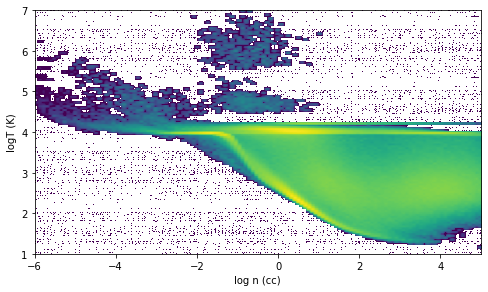

In [22]:
n = n050
T = T050
m = m050

rng = [[-6, 5], [1, 7]]

m_in_bin, x_edge, y_edge, _ = binned_statistic_2d(np.log10(n), 
                                                  np.log10(T), 
                                                  m, 
                                                  range = rng,
                                                  statistic='sum', bins=128)

extent = [x_edge[0], x_edge[-1], y_edge[0], y_edge[-1]]
print(extent)

fig, ax = plt.subplots(1, 1, figsize=(8, 8))
# cmap=mpl.colormaps['viridis']
# cmap.set_bad(

ax.imshow(m_in_bin.T, origin='lower', norm=mpl.colors.LogNorm(), extent=extent)
ax.set(xlim=rng[0], ylim=rng[1])
ax.set(xlabel='log n (cc)', ylabel='logT (K)')


### Jeans mass

In [23]:
def Jeans(rho, T):
    gamma = 5./3.
    
    XH = 0.76
    mp = 1.672621911E-24
    xe = 0
    mu = 4 * mp / (1 + 3*XH + 4*XH*xe)
    UnitEnergy_in_cgs         = 1.989e+53
    UnitMass_in_g             = 1.989e+43
    
    kB = 1.381E-16
    G = 43018.7
    
    Jeans_length = np.sqrt((5*  kB*T)/(2*np.pi*(gamma-1)*mu*rho*G) / (UnitEnergy_in_cgs/UnitMass_in_g))
    Jeans_mass = (4*np.pi/3.) * rho * Jeans_length**3
    
    return Jeans_length, Jeans_mass

In [24]:
rho050 = sn050.part0.rho.value
JL050, JM050 = Jeans(rho050, T050)

cell_volume = sn050.part0.mass.value / sn050.part0.rho.value
cell_size = (cell_volume * (3/(4*np.pi)))**(1/3.)

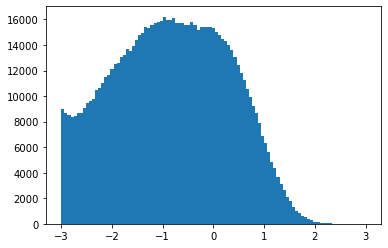

In [25]:
plt.hist(np.log10(m050/JM050), bins=np.linspace(-3, 3, 100));

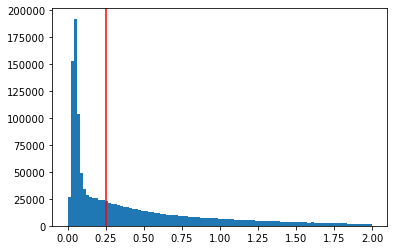

In [26]:
plt.hist(cell_size/JL050, bins=np.linspace(0, 2, 100));
plt.axvline(0.25, c='r')

In [30]:
print(rho050[np.argmax(rho050)], T050[np.argmax(rho050)])

38923.793 367.50534


In [32]:
np.min(JM050) * 1E10

4.763369698679298